In [1]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy

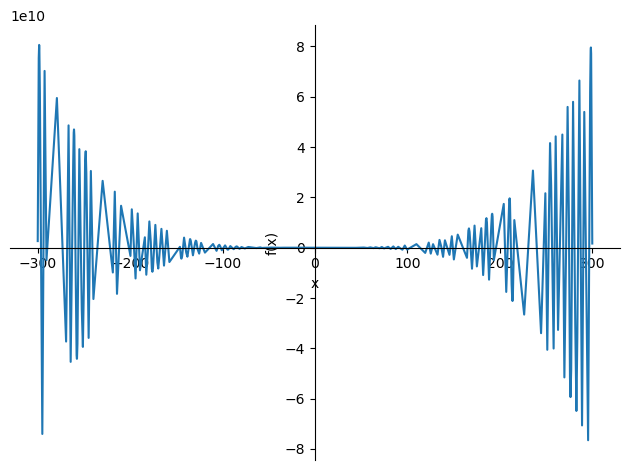

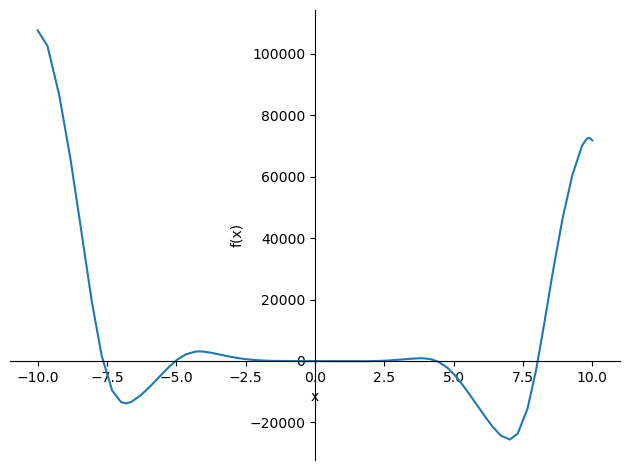

In [2]:
# График функции при помощи библиотеки sympy:
# в диапазоне -300...300
x = symbols('x')
plot(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30,
     (x, -300, 300))

# в диапазоне -10...10
x = symbols('x')
plot(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30,
     (x, -10, 10))

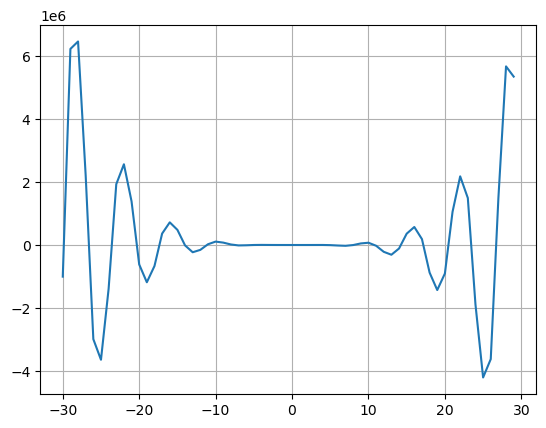

In [3]:
#  График функции при помощи библиотеки matplotlib:
x = [x for x in range(-30, 30)]
y = [(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30) for
     x in range(-30, 30)]
# y = [y for y in range(-30, 30)]
plt.plot(x, y)
plt.grid()
plt.show()

In [4]:
# Определяем корни:
def f(x):
    return -12 * x ** 4 * numpy.sin(
        numpy.cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30

funcrange = [-10, 10]
leftnum = min(funcrange)
rightnum = max(funcrange)

def solution():
    global leftnum, rightnum
    temp = leftnum
    rightnum = rightnum
    roots = []
    interval = []

    while temp < rightnum:
        if f(temp) >= 0 and f(temp + 1) <= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) <= 0 and f(temp + 1) >= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) > f(temp + 1) < f(temp + 2):
            interval.append(temp + 1)
        temp += 1
    roots = [round(i, 2) for i in roots]
    print(f'Корни уравнения для заданного интервала: {roots}')
    return roots

In [5]:
# Находим интервалы, на которых функция возрастает и убывает:
def func_interval(left, right):
    array = []
    temp = left
    while left < right:
        array.append([f(left), left])
        left += 0.1
    if array[0][0] > 0:
        print(f'f > 0 в промежутке {temp, right}')
        return max(array)
    else:
        print(f'f < 0 в промежутке {temp, right}')
        return min(array)

In [6]:
# Вычисляем координаты вершины функции на заданном интервале:
def maxima_and_minima():
    roots = solution()

    if len(roots) < 2:
        print('На заданном интервале нет вершин')
    else:
        top = []
        for i in range(len(roots) - 1):
            top.append(func_interval(roots[i], roots[i + 1]))
        for j in top:
            j = [round(i, 2) for i in j]
            print(f'Координаты вершин функции: [{j[1]}, {j[0]}]')
        if len(top) < 2:
            print('error')
        else:
            for i in range(len(top) - 1):
                if top[i][0] > top[i + 1][0]:
                    print('Функция убывает')
                else:
                    print('Функция возрастает')

In [7]:
maxima_and_minima()

Корни уравнения для заданного интервала: [-7.65, -5.03, -1.34, 2.27, 4.38, 8.04]
f < 0 в промежутке (-7.65, -5.03)
f < 0 в промежутке (-5.03, -1.34)
f > 0 в промежутке (-1.34, 2.27)
f < 0 в промежутке (2.27, 4.38)
f > 0 в промежутке (4.38, 8.04)
Координаты вершин функции: [-6.85, -13815.93]
Координаты вершин функции: [-5.03, -23.2]
Координаты вершин функции: [-1.34, 0.11]
Координаты вершин функции: [2.27, -0.88]
Координаты вершин функции: [4.38, 12.9]
Функция возрастает
Функция возрастает
Функция убывает
Функция возрастает
